# simpleimputer 활용한 결측치 대치

- 데이터 셋의 missing value를 특정한 값으로 채우는 기능을 제공



In [2]:
# 라이브러리 가져오기
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import pandas as pd

## 데이터 전처리

In [3]:
mpg = sns.load_dataset('mpg')

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
mpg_x = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

In [8]:
msv = np.random.randint(0, 398, 30)

In [9]:
mpg_x.iloc[msv] = np.nan

In [10]:
mpg_x.isna().sum()

cylinders       30
displacement    30
horsepower      35
weight          30
acceleration    30
dtype: int64

In [11]:
mpg_sp = pd.concat([mpg_x, mpg['mpg']], axis = 1)

In [12]:
mpg_sp.head(50)

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8.0,307.0,130.0,3504.0,12.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,15.0
2,8.0,318.0,150.0,3436.0,11.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,17.0
5,8.0,429.0,198.0,4341.0,10.0,15.0
6,8.0,454.0,220.0,4354.0,9.0,14.0
7,8.0,440.0,215.0,4312.0,8.5,14.0
8,8.0,455.0,225.0,4425.0,10.0,14.0
9,8.0,390.0,190.0,3850.0,8.5,15.0


## simpleimputer 활용

### 평균으로 대치

In [13]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [14]:
imp_mean = imp_mean.fit_transform(mpg_sp)

In [15]:
imp_mean = pd.DataFrame(imp_mean)

In [16]:
imp_mean.columns = mpg_sp.columns

In [17]:
imp_mean

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8.0,307.0,130.0,3504.0,12.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,15.0
2,8.0,318.0,150.0,3436.0,11.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,17.0
...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,27.0
394,4.0,97.0,52.0,2130.0,24.6,44.0
395,4.0,135.0,84.0,2295.0,11.6,32.0
396,4.0,120.0,79.0,2625.0,18.6,28.0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(imp_mean.drop('mpg', axis = 1), imp_mean['mpg'],
                                                   test_size = 0.3, random_state = 111)

In [29]:
fit_train1 = sm.OLS(y_train, x_train)

In [30]:
fit_train1 = fit_train1.fit() 

In [31]:
y_mean_pred = fit_train1.predict(x_test)

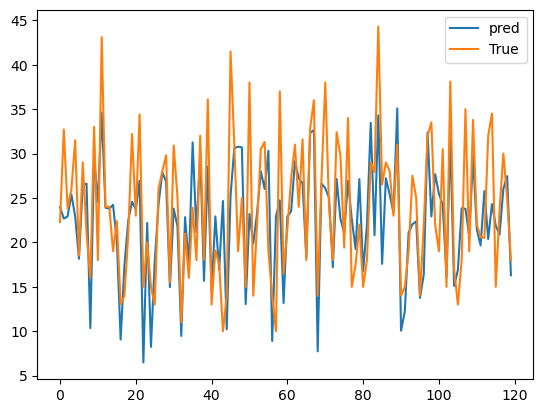

In [34]:
plt.plot(np.array(y_mean_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = y_mean_pred)
print(mse1)

33.64082667154491


### 최빈값으로 대치

In [36]:
imp_freq = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [37]:
imp_freq = imp_freq.fit_transform(mpg_sp)

In [38]:
imp_freq = pd.DataFrame(imp_freq)

In [39]:
imp_freq.columns = mpg_sp.columns

In [40]:
x_train, x_test, y_train, y_test = train_test_split(imp_freq.drop('mpg', axis = 1), imp_freq['mpg'],
                                                   test_size = 0.3, random_state = 111)

In [ ]:
fit_train2 = sm.OLS(y_train, x_train)

In [41]:
fit_train2 = fit_train2.fit() 

In [42]:
y_freq_pred = fit_train1.predict(x_test)

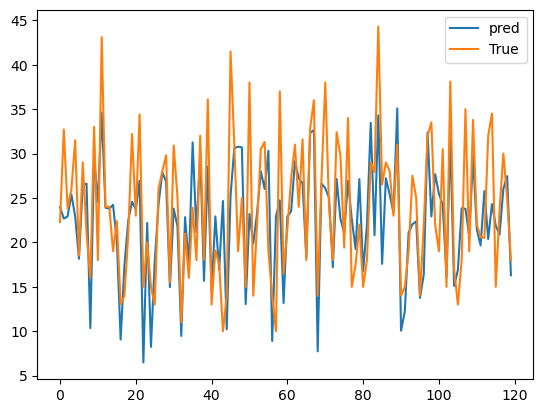

In [43]:
plt.plot(np.array(y_mean_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = y_freq_pred)
print(mse2)

39.730916026569986


### 중간값으로 대치

In [54]:
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [55]:
imp_med = imp_med.fit_transform(mpg_sp)

In [56]:
imp_med = pd.DataFrame(imp_med)

In [57]:
imp_med.columns = mpg_sp.columns

In [58]:
x_train, x_test, y_train, y_test = train_test_split(imp_med.drop('mpg', axis = 1), imp_med['mpg'],
                                                   test_size = 0.3, random_state = 111)

In [59]:
fit_train3 = sm.OLS(y_train, x_train)

In [60]:
fit_train3 = fit_train3.fit() 

In [61]:
y_med_pred = fit_train3.predict(x_test)

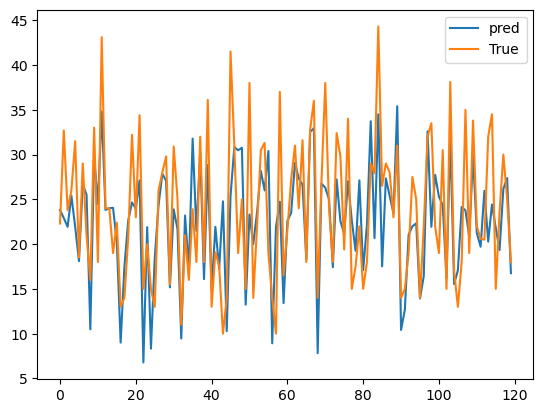

In [63]:
plt.plot(np.array(y_med_pred), label = 'pred')
plt.plot(np.array(y_test), label = 'True')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = y_med_pred)
print(mse3)

33.44525697266926


# 정리
    
    - mean : mse 33.64082667154491
    - most frequent : mse 39.730916026569986
    - median : mse 33.44525697266926